### Importing Libraries

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

#### Reading csv

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
x=df.drop('Churn',axis=1)
x

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,0,1,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,84.80,1990.50,0,1,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,103.20,7362.90,1,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,29.60,346.45,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,74.40,306.60,0,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [5]:
x.columns

Index(['MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male',
       'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contrac

In [6]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [8]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [9]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [10]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [11]:
model_dt.score(x_test,y_test)

0.7846481876332623

In [12]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.52      0.56       371

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [13]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [14]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [15]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [16]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9357876712328768
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       546
           1       0.93      0.95      0.94       622

    accuracy                           0.94      1168
   macro avg       0.94      0.93      0.94      1168
weighted avg       0.94      0.94      0.94      1168



In [17]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[503  43]
 [ 32 590]]


Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

Let's try with some other classifier.

#### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [20]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [21]:
y_pred=model_rf.predict(x_test)

In [22]:
model_rf.score(x_test,y_test)

0.7953091684434968

In [23]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       371

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



In [24]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [25]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [26]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [27]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [28]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [29]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [30]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9473237043330501
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       526
           1       0.94      0.97      0.95       651

    accuracy                           0.95      1177
   macro avg       0.95      0.94      0.95      1177
weighted avg       0.95      0.95      0.95      1177



In [31]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[483  43]
 [ 19 632]]


With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

#### Performing PCA

In [32]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [33]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [34]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [35]:
yr_predict_pca = model.predict(xr_test_pca)

In [36]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [37]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7493627867459643
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       526
           1       0.75      0.83      0.79       651

    accuracy                           0.75      1177
   macro avg       0.75      0.74      0.74      1177
weighted avg       0.75      0.75      0.75      1177



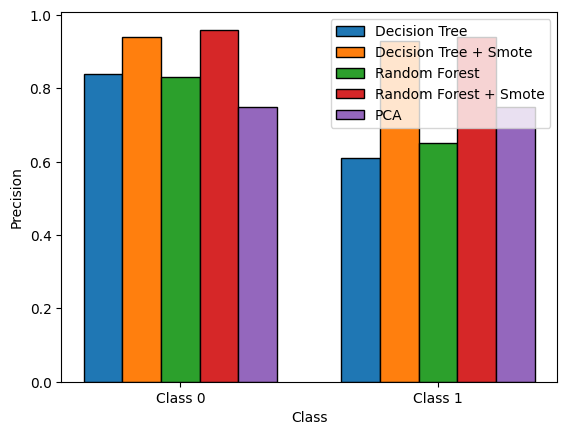

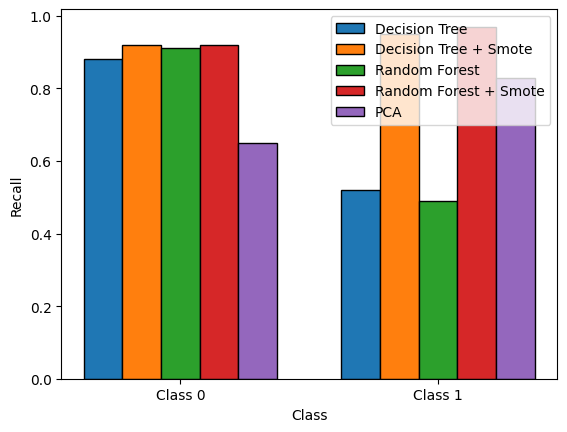

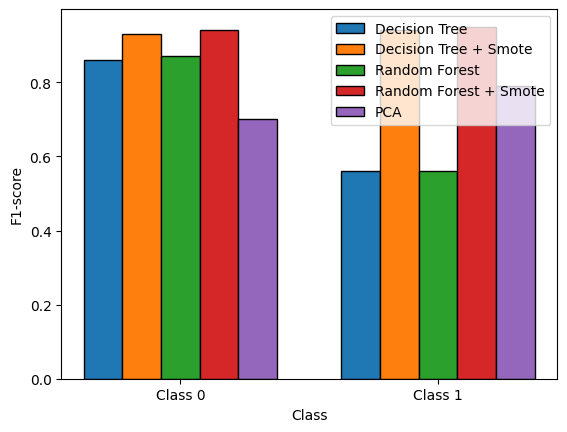

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Model 1 performance metrics
model1_precision = [0.84, 0.61]
model1_recall = [0.88, 0.52]
model1_f1score = [0.86, 0.56]

# Model 2 performance metrics
model2_precision = [0.94, 0.93]
model2_recall = [0.92, 0.95]
model2_f1score = [0.93, 0.94]

# Model 3 performance metrics
model3_precision = [0.83, 0.65]
model3_recall = [0.91, 0.49]
model3_f1score = [0.87, 0.56]

# Model 4 performance metrics
model4_precision = [0.96, 0.94]
model4_recall = [0.92, 0.97]
model4_f1score = [0.94, 0.95]

# Model 5 performance metrics
model5_precision = [0.75, 0.75]
model5_recall = [0.65, 0.83]
model5_f1score = [0.70, 0.79]

# Classes
classes = ['Class 0', 'Class 1']

# Set the width of the bars
bar_width = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Define color schemes for each model
color_model1 = '#1f77b4'
color_model2 = '#ff7f0e'
color_model3 = '#2ca02c'
color_model4 = '#d62728'
color_model5 = '#9467bd'

# Plotting the bars for precision
plt.bar(r1, model1_precision, color=color_model1, width=bar_width, edgecolor='black', label='Decision Tree')
plt.bar(r2, model2_precision, color=color_model2, width=bar_width, edgecolor='black', label='Decision Tree + Smote')
plt.bar(r3, model3_precision, color=color_model3, width=bar_width, edgecolor='black', label='Random Forest')
plt.bar(r4, model4_precision, color=color_model4, width=bar_width, edgecolor='black', label='Random Forest + Smote')
plt.bar(r5, model5_precision, color=color_model5, width=bar_width, edgecolor='black', label='PCA')

# Add xticks and labels
plt.xlabel('Class')
plt.ylabel('Precision')
plt.xticks([r + bar_width*2 for r in range(len(classes))], classes)

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Plotting the bars for recall
plt.bar(r1, model1_recall, color=color_model1, width=bar_width, edgecolor='black', label='Decision Tree')
plt.bar(r2, model2_recall, color=color_model2, width=bar_width, edgecolor='black', label='Decision Tree + Smote')
plt.bar(r3, model3_recall, color=color_model3, width=bar_width, edgecolor='black', label='Random Forest')
plt.bar(r4, model4_recall, color=color_model4, width=bar_width, edgecolor='black', label='Random Forest + Smote')
plt.bar(r5, model5_recall, color=color_model5, width=bar_width, edgecolor='black', label='PCA')

# Add xticks and labels
plt.xlabel('Class')
plt.ylabel('Recall')
plt.xticks([r + bar_width*2 for r in range(len(classes))], classes)

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Plotting the bars for F1-score
plt.bar(r1, model1_f1score, color=color_model1, width=bar_width, edgecolor='black', label='Decision Tree')
plt.bar(r2, model2_f1score, color=color_model2, width=bar_width, edgecolor='black', label='Decision Tree + Smote')
plt.bar(r3, model3_f1score, color=color_model3, width=bar_width, edgecolor='black', label='Random Forest')
plt.bar(r4, model4_f1score, color=color_model4, width=bar_width, edgecolor='black', label='Random Forest + Smote')
plt.bar(r5, model5_f1score, color=color_model5, width=bar_width, edgecolor='black', label='PCA')

# Add xticks and labels
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.xticks([r + bar_width*2 for r in range(len(classes))], classes)

# Add a legend
plt.legend()

# Show the plot
plt.show()


##### With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

#### Pickling the model

In [39]:
import pickle

In [40]:
filename = 'model.sav'

In [41]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [42]:
load_model = pickle.load(open(filename, 'rb'))

In [43]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [44]:
model_score_r1

0.9473237043330501

##### Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.